<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Classification?

* Binary Classification - E.g. True, False. 
* Muiticlass Calssification - E.g More than 2 categories.
* Multilabel classification - E.g. What tags does an Article have. 

We need to convert our images to tensors to use the Classification Modelling. 

## Inputs and Output shapes

The output is generated as the Probability of the possible outcomes of the Classification

Input=[batch size, width, height, color_channels]
or
Input=[32,224,224,3]

Output= The shape could be the no. of possibilities we have in a classification problem(oor classes)


## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |


## Creating data to View and Fit

In [1]:
import tensorflow as tf

In [2]:

from sklearn.datasets import make_circles

#Make 1000 samples
n_samples=1000

#Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our Data is a little hard to understand. Let's Visualize it!

In [5]:
import pandas as pd

circles=pd.DataFrame({"X0":X[:,0],
                     "X1":X[:,1],
                     "label":y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


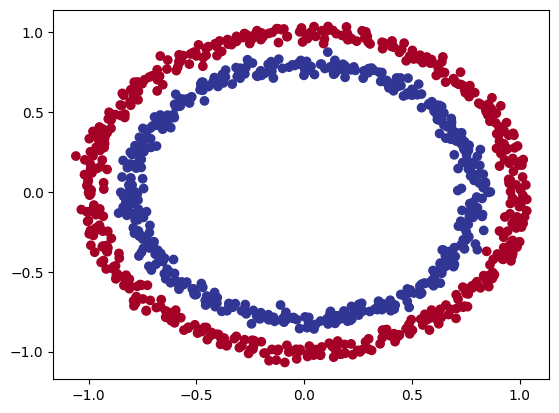

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

Steps in Modelling with tensorflow are :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model.
5. Tweak.
6. Evaluate.....

In [17]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create the model using the sequential API
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 6.5329 - accuracy: 0.4968
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 13ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 12ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 7.6246 - accuracy: 0.5000


In [18]:
#Let's try improving our model for training a little longer
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [20]:
model_1.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we are working on a binary classification Problem and we are getting 50% accuracy, it's performing like it's guessing, so adding more layers to 

In [22]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create a model , this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0349 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6996 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6959 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5030
Epoch 11/

In [23]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937403082847595, 0.5]

## Improving our Model

1. Create a model - We might want to add more layers or increase the number of hidden units within out layers
2. Compile a model - here we can choose a different optimization function such as adam apart from SGD
3. Fitting a model - we can fit our model for more epochs(leave it training for longer)


In [24]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [25]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model (This time with 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X,y,epochs=100,verbose=False)

In [26]:
#4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5040


[0.6987013220787048, 0.5040000081062317]

Visualize our model's predictions, let's create a function 'plot_decision_boundary'

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the MeshGrid
*Plot the predictions as well as line between the zones(where each unique class falls)

In [37]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  
  #Create X Values(We're going to make prediction on these)
  x_in=np.c_[xx.ravel(),yy.ravel()] #Stack 2 D arrays together

  y_pred=model.predict(x_in)

  #Check for multiclass
  if len(y_pred[0])>1:
    print("we're doing multiclass classification")
    #We have to reshape our predictions to get them redy for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("We're doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
We're doing binary classification


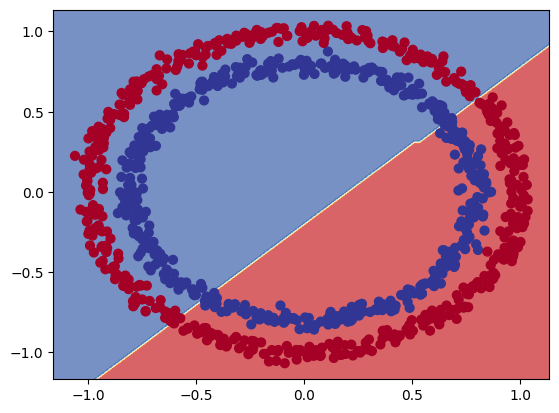

In [38]:
#Checkout the predictions our model is making
plot_decision_boundary(model_3,X,y)